# Rental living space prices in Germany
From information in this dataset which was collected in 2019 we would like to compare how rent prices and rent prices per square meter differ by living space, No of rooms, type of living space in different regions in Germany and try to predict them using linear regression.

In [ ]:
# Import dataset and short review

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('Apartment_rental_Germany.csv')

In [3]:
df.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
df.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


In [6]:
df.isnull().sum().sort_values(ascending=False)

telekomHybridUploadSpeed    223830
electricityKwhPrice         222004
electricityBasePrice        222004
energyEfficiencyClass       191063
lastRefurbish               188139
heatingCosts                183332
noParkSpaces                175798
petsAllowed                 114573
interiorQual                112665
thermalChar                 106506
numberOfFloors               97732
houseNumber                  71018
streetPlain                  71013
condition                    68489
yearConstructed              57045
yearConstructedRange         57045
firingTypes                  56964
facilities                   52924
floor                        51309
heatingType                  44856
totalRent                    40517
typeOfFlat                   36614
telekomUploadSpeed           33358
telekomTvOffer               32619
description                  19747
serviceCharge                 6909
pricetrend                    1832
regio3                           0
regio2              

In [7]:
# Dataset cleaning filtering

In [8]:
df = df.drop(['geo_bln', 'telekomHybridUploadSpeed', 'picturecount', 'pricetrend', 'scoutId', 'houseNumber', 'street', 
         'streetPlain', 'noRoomsRange', 'livingSpaceRange', 'geo_krs', 'regio3', 'description', 'facilities',
        'energyEfficiencyClass', 'date', 'electricityBasePrice', 'electricityKwhPrice', 'firingTypes',
             'telekomUploadSpeed', 'yearConstructedRange', 'heatingType', 'thermalChar', 'baseRentRange',
              'numberOfFloors', 'noParkSpaces', 'telekomTvOffer'], axis=1)

In [9]:
df['lastRefurbish'] = df['lastRefurbish'].fillna(df['yearConstructed'])

In [10]:
df = df.dropna(subset=['lastRefurbish'])
df = df.dropna(subset=['yearConstructed'])
df = df.dropna(subset=['totalRent'])

In [11]:
df['serviceCharge'].fillna(df['serviceCharge'].mean(), inplace=True)
df['heatingCosts'].fillna(df['heatingCosts'].mean(), inplace=True)
df['floor'].fillna(df['floor'].mean(), inplace=True)

In [12]:
df['int_luxury'] = (df['interiorQual'] == 'luxury').astype(int)
df['int_simple'] = (df['interiorQual'] == 'simple').astype(int)
df['int_sophisticated'] = (df['interiorQual'] == 'sophisticated').astype(int)
df['int_normal'] = (df['interiorQual'] == 'normal').astype(int)

In [13]:
df['cond_well_kept'] = (df['condition'] == 'well_kept').astype(int)
df['cond_first_time_use'] = (df['condition'] == 'first_time_use').astype(int)
df['cond_refurbished'] = (df['condition'] == 'refurbished').astype(int)
df['cond_mint_condition'] = (df['condition'] == 'mint_condition').astype(int)
df['cond_first_time_use_after_refurbishment'] = (df['condition'] == 'first_time_use_after_refurbishment').astype(int)
df['cond_fully_renovated'] = (df['condition'] == 'fully_renovated').astype(int)
df['cond_modernized'] = (df['condition'] == 'modernized').astype(int)
df['cond_negotiable'] = (df['condition'] == 'negotiable').astype(int)
df['cond_need_of_renovation'] = (df['condition'] == 'need_of_renovation').astype(int)
df['cond_ripe_for_demolition'] = (df['condition'] == 'ripe_for_demolition').astype(int)

In [14]:
df['pets_yes'] = (df['petsAllowed'] == 'yes').astype(int)
df['pets_no'] = (df['petsAllowed'] == 'no').astype(int)
df['pets_negotiable'] = (df['petsAllowed'] == 'negotiable').astype(int)

In [15]:
df['ground_floor'] = (df['typeOfFlat'] == 'ground_floor').astype(int)
df['apartment'] = (df['typeOfFlat'] == 'apartment').astype(int)
df['roof_storey'] = (df['typeOfFlat'] == 'roof_storey').astype(int)
df['raised_ground_floor'] = (df['typeOfFlat'] == 'raised_ground_floor').astype(int)
df['terraced_flat'] = (df['typeOfFlat'] == 'terraced_flat').astype(int)
df['maisonette'] = (df['typeOfFlat'] == 'maisonette').astype(int)
df['penthouse'] = (df['typeOfFlat'] == 'penthouse').astype(int)
df['half_basement'] = (df['typeOfFlat'] == 'half_basement').astype(int)
df['loft'] = (df['typeOfFlat'] == 'loft').astype(int)

In [16]:
df['rentPerSquareM'] = df['baseRent'] / df['livingSpace']

In [17]:
df = df[df.baseRent != 0]
df = df[df.livingSpace != 0]

In [18]:
df = df[df['lastRefurbish'] <= 2019]

In [19]:
# Data visualization

In [20]:
df['baseRent_log'] = np.log(df['baseRent'])
df['totalRent_log'] = np.log(df['totalRent'])

C:\Users\Mykolas\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
def space_size(space):
    if space <= 30:
        return "0 - 30"
    elif space <= 50:
        return "31 - 50"
    elif space <= 70:
        return "51 - 70"
    elif space <= 100:
        return "71 - 100"
    elif space <= 150:
        return "101 - 150"
    elif space <= 200:
        return "151 - 200"
    else:
        return "200+"

In [22]:
df['livingSpaceGroup'] = df['livingSpace'].map(space_size)

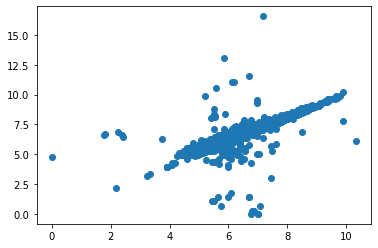

In [23]:
plt.scatter(data=df, x='baseRent_log', y='totalRent_log')

In [34]:
df['rentPerSquareM_log'] = np.log(df['rentPerSquareM'])

C:\Users\Mykolas\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


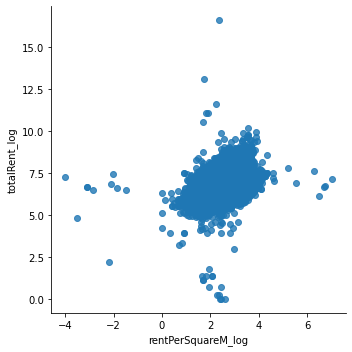

In [36]:
sns.lmplot(x = 'rentPerSquareM_log', y = 'totalRent_log', data = df)

In [30]:
df['livingSpace_log'] = np.log(df['livingSpace'])
df['serviceCharge_log'] = np.log(df['serviceCharge'])
df['heatingCosts_log'] = np.log(df['heatingCosts'])

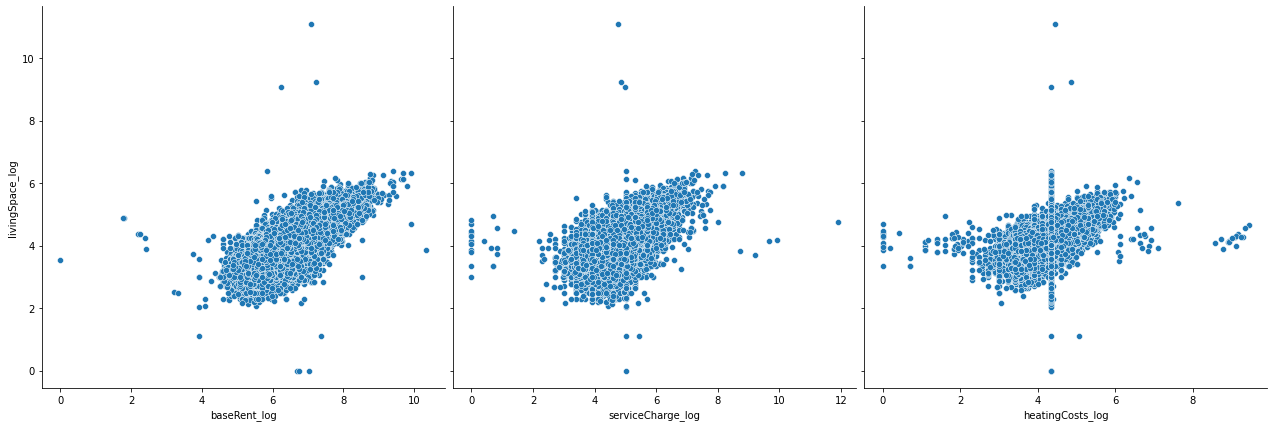

In [31]:
sns.pairplot(data = df,
             x_vars = ['baseRent_log', 'serviceCharge_log', 'heatingCosts_log'],
             y_vars = ['livingSpace_log'],
             height = 6)

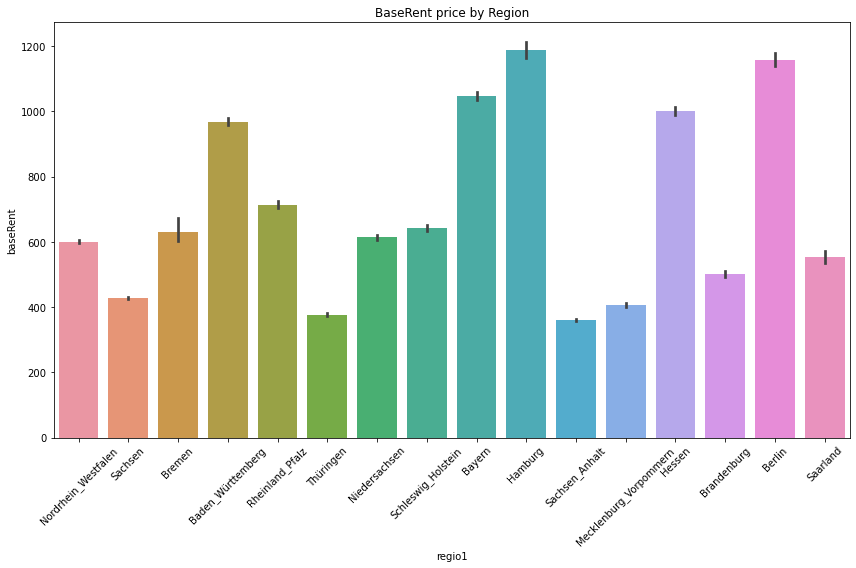

In [46]:
fig, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='regio1', y='baseRent', data=df).set(title='BaseRent price by Region')
plt.xticks(rotation=45)
plt.tight_layout()

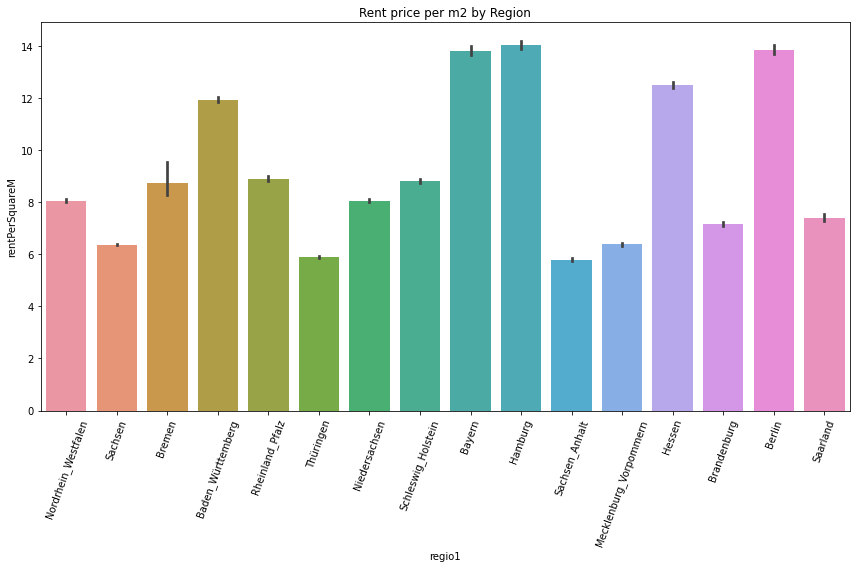

In [47]:
fig, axs = plt.subplots(1,1, figsize=(12,8))
sns.barplot(x='regio1', y='rentPerSquareM', data=df).set(title='Rent price per m2 by Region')
plt.xticks(rotation=70)
plt.tight_layout()

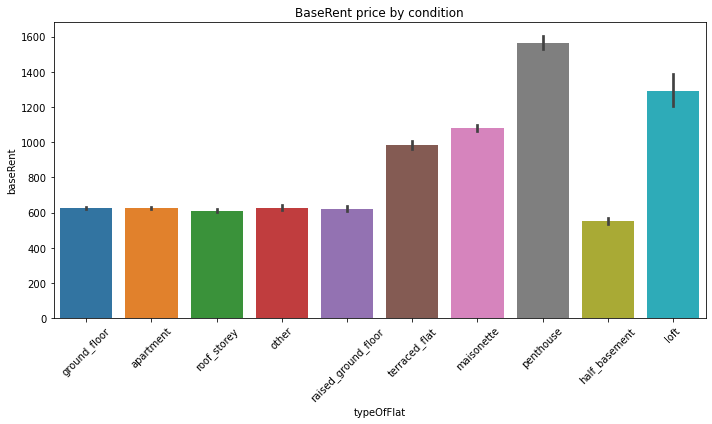

In [49]:
fig, axs = plt.subplots(1,1, figsize=(10,6))
sns.barplot(x='typeOfFlat', y='baseRent', data=df).set(title='BaseRent price by condition')
plt.xticks(rotation=45)
plt.tight_layout()

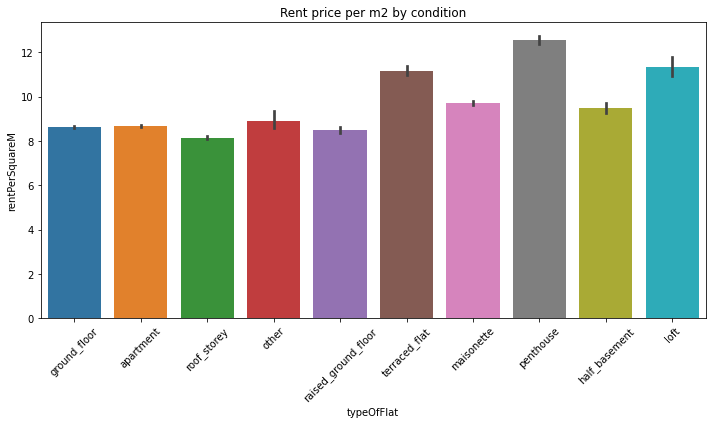

In [50]:
fig, axs = plt.subplots(1,1, figsize=(10,6))
sns.barplot(x='typeOfFlat', y='rentPerSquareM', data=df).set(title='Rent price per m2 by condition')
plt.xticks(rotation=45)
plt.tight_layout()

In [62]:
rentPerRoom = pd.pivot_table(data=df, index='regio1', columns = 'noRooms', values = 'baseRent', aggfunc='mean')[[1,2,3,4,5,6]]

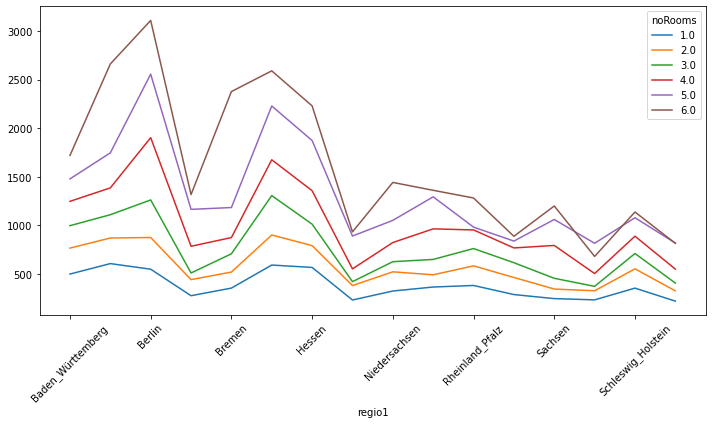

In [63]:
rentPerRoom.plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.tight_layout()

In [64]:
rentSquareMPerRoom = pd.pivot_table(data=df, index='regio1', columns = 'noRooms', values = 'rentPerSquareM', aggfunc='mean')[[1,2,3,4,5,6]]

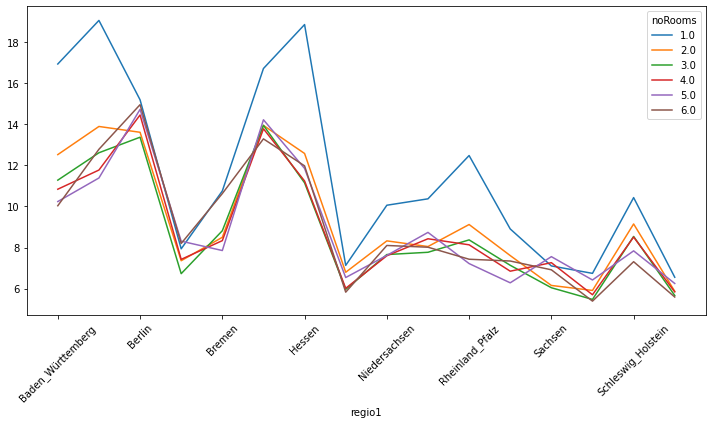

In [65]:
rentSquareMPerRoom.plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.tight_layout()

In [66]:
rentPerSpace = pd.pivot_table(data=df, index='regio1', columns = 'livingSpaceGroup', values = 'baseRent', aggfunc='mean')[['0 - 30','31 - 50','51 - 70','71 - 100','101 - 150','151 - 200', '200+']]

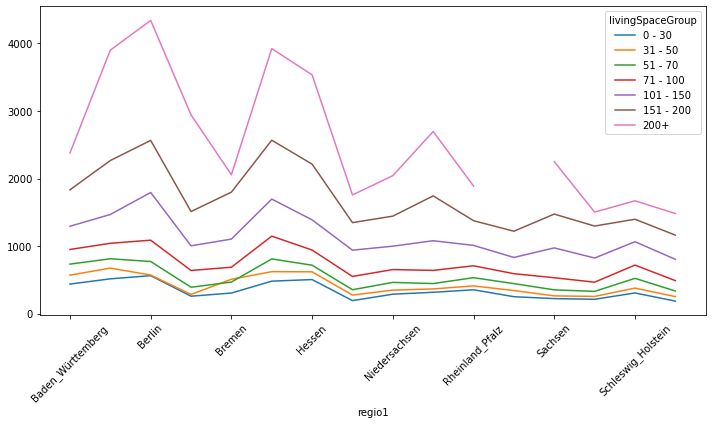

In [67]:
rentPerSpace.plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.tight_layout()

In [68]:
rentPerSpace2 = pd.pivot_table(data=df, index='regio1', columns = 'livingSpaceGroup', values = 'rentPerSquareM', aggfunc='mean')[['0 - 30','31 - 50','51 - 70','71 - 100','101 - 150','151 - 200', '200+']]

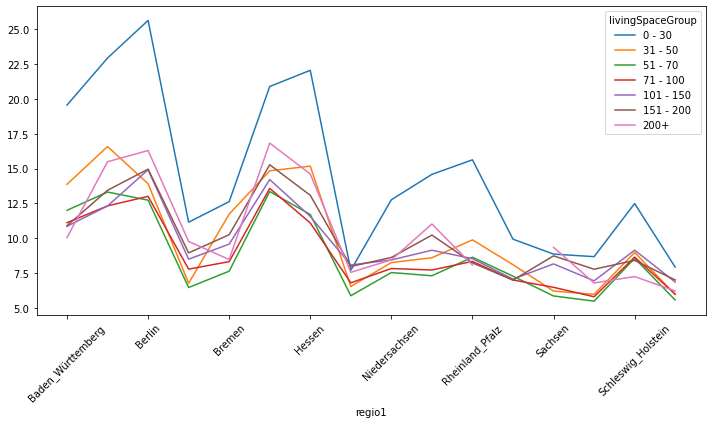

In [69]:
rentPerSpace2.plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.tight_layout()

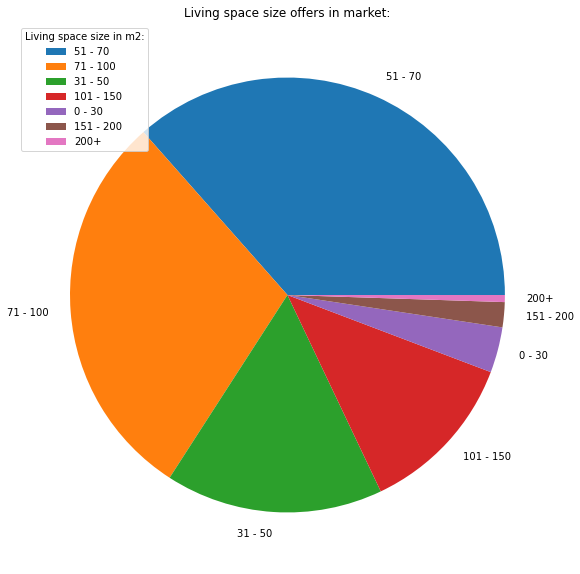

In [72]:
x = df['livingSpaceGroup'].value_counts()
mylabels = ["51 - 70", "71 - 100", "31 - 50", "101 - 150", "0 - 30", "151 - 200", "200+"]
fig, ax = plt.subplots(1,1, figsize=(18,10))
ax.pie(x=x, labels=mylabels, radius=1)
ax.set_title("Living space size offers in market:")
plt.legend(title = "Living space size in m2:", loc="upper left")
plt.show()

In [ ]:
# Linear regression of baseRent

In [26]:
y=df['baseRent']

In [27]:
X=df[['serviceCharge', 'newlyConst', 'balcony',
       'yearConstructed', 'hasKitchen', 'cellar',
       'livingSpace',
       'lift', 'noRooms', 'lastRefurbish', 'apartment', 'roof_storey',
       'terraced_flat', 'maisonette', 'penthouse', 'loft',
       'pets_yes', 'pets_no', 'pets_negotiable', 'int_luxury', 'int_simple',
       'int_sophisticated', 'int_normal', 'cond_well_kept',
       'cond_first_time_use', 'cond_refurbished', 'cond_mint_condition',
       'cond_first_time_use_after_refurbishment', 'cond_fully_renovated',
       'cond_modernized', 'cond_negotiable', 'cond_need_of_renovation']]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [33]:
lm = LinearRegression()

In [34]:
lm.fit(X_train, y_train)

LinearRegression()

In [35]:
print(lm.intercept_)

149.40292684295093


In [36]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
serviceCharge,1.334477
newlyConst,119.045715
balcony,65.771066
yearConstructed,-0.549123
hasKitchen,174.455666
cellar,-32.978869
livingSpace,0.144873
lift,131.013190
noRooms,84.193447
lastRefurbish,0.515787


In [37]:
predictions = lm.predict(X_test)

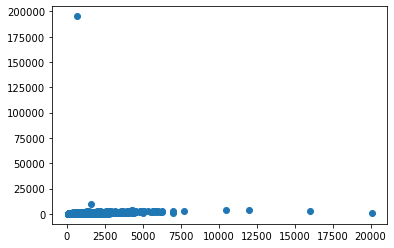

In [38]:
plt.scatter(x=y_test, y=predictions)

In [39]:
r2_score(y_test, predictions)

-3.5556031440183498

In [284]:
model = smf.ols(formula ='baseRent ~ serviceCharge + newlyConst + balcony + yearConstructed + hasKitchen + cellar + livingSpace + lift + noRooms + heatingCosts + lastRefurbish + apartment + roof_storey + terraced_flat + maisonette + penthouse + loft + pets_yes + pets_no + pets_negotiable + int_luxury + int_simple + int_sophisticated + int_normal + cond_well_kept + cond_first_time_use + cond_refurbished + cond_mint_condition + cond_first_time_use_after_refurbishment + cond_fully_renovated + cond_modernized + cond_negotiable + cond_need_of_renovation', data=df).fit() 

In [285]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               baseRent   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     3796.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:59:14   Log-Likelihood:            -1.2953e+06
No. Observations:              174847   AIC:                         2.591e+06
Df Residuals:                  174813   BIC:                         2.591e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 289.4802     50.865      5.691      0.000     189.786     389.175
newlyConst[T.True]                        122.6722      5.413     22.663      0.000     112.063     133.281
balcony[T.True]                            80.5891      2.172     37.104      0.000      76.332      84.846
hasKitchen[T.True]                        190.1193      2.182     87.118      0.000     185.842     194.397
cellar[T.True]                            -33.3701      2.089    -15.972      0.000     -37.465     -29.275
lift[T.True]                              176.3761      2.502     70.493      0.000     171.472     181.280
serviceCharge                               0.1131      0.003     43.075      0.000       0.108       0.118
yearConstructed                            -0.6241      0.030    -20.964      0.000      -0.682      -0.566
livingSpace                                 0.2153      0.006     36.669      0.000       0.204       0.227
noRooms                                   115.8424      0.814    142.249      0.000     114.246     117.439
heatingCosts                                0.1370      0.011     12.128      0.000       0.115       0.159
lastRefurbish                               0.5425      0.032     17.093      0.000       0.480       0.605
apartment                                  -7.3925      2.210     -3.345      0.001     -11.724      -3.061
roof_storey                                18.2507      3.264      5.592      0.000      11.853      24.648
terraced_flat                             100.4723      8.710     11.535      0.000      83.401     117.544
maisonette                                225.1347      5.613     40.108      0.000     214.133     236.136
penthouse                                 410.4247      8.559     47.951      0.000     393.649     427.201
loft                                      358.8556     17.693     20.283      0.000     324.178     393.533
pets_yes                                  -39.0205      5.058     -7.715      0.000     -48.934     -29.107
pets_no                                    13.9973      2.844      4.922      0.000       8.423      19.572
pets_negotiable                           -30.9158      2.352    -13.144      0.000     -35.526     -26.306
int_luxury                                582.6080      6.234     93.458      0.000     570.390     594.826
int_simple                                -81.0454     12.094     -6.701      0.000    -104.749     -57.341
int_sophisticated                         106.5673      3.088     34.513      0.000     100.515     112.619
int_normal                                -78.4253      2.614    -29.997      0.000     -83.550     -73.301
cond_well_kept                            -34.4204      3.0

In [ ]:
# Linear regression of rentPerSquareM

In [101]:
y1=df['rentPerSquareM']

In [103]:
X1=df[['serviceCharge', 'newlyConst', 'balcony',
       'yearConstructed', 'hasKitchen', 'cellar',
       'livingSpace',
       'lift', 'noRooms', 'lastRefurbish', 'apartment', 'roof_storey',
       'terraced_flat', 'maisonette', 'penthouse', 'loft',
       'pets_yes', 'pets_no', 'pets_negotiable', 'int_luxury', 'int_simple',
       'int_sophisticated', 'int_normal', 'cond_well_kept',
       'cond_first_time_use', 'cond_refurbished', 'cond_mint_condition',
       'cond_first_time_use_after_refurbishment', 'cond_fully_renovated',
       'cond_modernized', 'cond_negotiable', 'cond_need_of_renovation']]

In [124]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state = 16)

In [125]:
lm = LinearRegression()

In [126]:
lm.fit(X1_train, y1_train)

LinearRegression()

In [127]:
print(lm.intercept_)

1.5815085368348445


In [128]:
coeff_df = pd.DataFrame(lm.coef_, X1.columns, columns=['Coefficients'])
coeff_df

,Coefficients
serviceCharge,0.000091
newlyConst,1.595257
balcony,-0.013270
yearConstructed,-0.000606
hasKitchen,2.491309
cellar,-0.709855
livingSpace,-0.000384
lift,1.988066
noRooms,-0.033597
lastRefurbish,0.003975


In [129]:
predictions = lm.predict(X1_test)

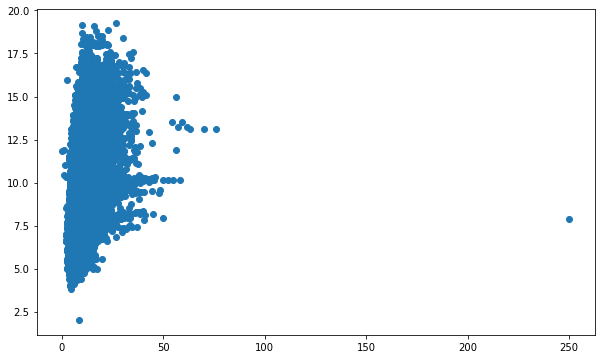

In [130]:
plt.scatter(x=y1_test, y=predictions)

In [131]:
r2_score(y1_test, predictions)

0.29593187576226254

In [134]:
model = smf.ols(formula ='rentPerSquareM ~ serviceCharge + newlyConst + balcony + yearConstructed + hasKitchen + cellar + livingSpace + lift + noRooms + heatingCosts + lastRefurbish + apartment + roof_storey + terraced_flat + maisonette + penthouse + loft + pets_yes + pets_no + pets_negotiable + int_luxury + int_simple + int_sophisticated + int_normal + cond_well_kept + cond_first_time_use + cond_refurbished + cond_mint_condition + cond_first_time_use_after_refurbishment + cond_fully_renovated + cond_modernized + cond_negotiable + cond_need_of_renovation', data=df).fit() 

In [135]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         rentPerSquareM   R-squared:                       0.169
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     1077.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:37:58   Log-Likelihood:            -5.5660e+05
No. Observations:              174847   AIC:                         1.113e+06
Df Residuals:                  174813   BIC:                         1.114e+06
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                   0.9508      0.744      1.278      0.201      -0.507       2.409
newlyConst[T.True]                          1.5689      0.079     19.817      0.000       1.414       1.724
balcony[T.True]                             0.0066      0.032      0.209      0.835      -0.056       0.069
hasKitchen[T.True]                          2.4848      0.032     77.851      0.000       2.422       2.547
cellar[T.True]                             -0.7158      0.031    -23.424      0.000      -0.776      -0.656
lift[T.True]                                1.9773      0.037     54.033      0.000       1.906       2.049
serviceCharge                               0.0001   3.84e-05      3.306      0.001    5.17e-05       0.000
yearConstructed                            -0.0006      0.000     -1.398      0.162      -0.001       0.000
livingSpace                                -0.0004   8.59e-05     -4.588      0.000      -0.001      -0.000
noRooms                                    -0.0936      0.012     -7.858      0.000      -0.117      -0.070
heatingCosts                            -1.489e-05      0.000     -0.090      0.928      -0.000       0.000
lastRefurbish                               0.0044      0.000      9.434      0.000       0.003       0.005
apartment                                  -0.1306      0.032     -4.041      0.000      -0.194      -0.067
roof_storey                                -0.4297      0.048     -9.002      0.000      -0.523      -0.336
terraced_flat                               0.3030      0.127      2.378      0.017       0.053       0.553
maisonette                                  0.0055      0.082      0.067      0.947      -0.155       0.166
penthouse                                   0.0093      0.125      0.074      0.941      -0.236       0.255
loft                                        0.0706      0.259      0.273      0.785      -0.437       0.578
pets_yes                                   -0.6102      0.074     -8.249      0.000      -0.755      -0.465
pets_no                                     1.2238      0.042     29.421      0.000       1.142       1.305
pets_negotiable                            -0.3734      0.034    -10.855      0.000      -0.441      -0.306
int_luxury                                  3.2585      0.091     35.739      0.000       3.080       3.437
int_simple                                 -0.6933      0.177     -3.919      0.000      -1.040      -0.347
int_sophisticated                           0.8414      0.045     18.631      0.000       0.753       0.930
int_normal                                 -0.7628      0.038    -19.948      0.000      -0.838      -0.688
cond_well_kept                             -0.8787      0.0